# Assignment 6

EX: 3 

In this problem, you will perform K-means clustering manually, with
K = 2, on a small example with n = 6 observations and p = 2
features.

a) Plot the observations

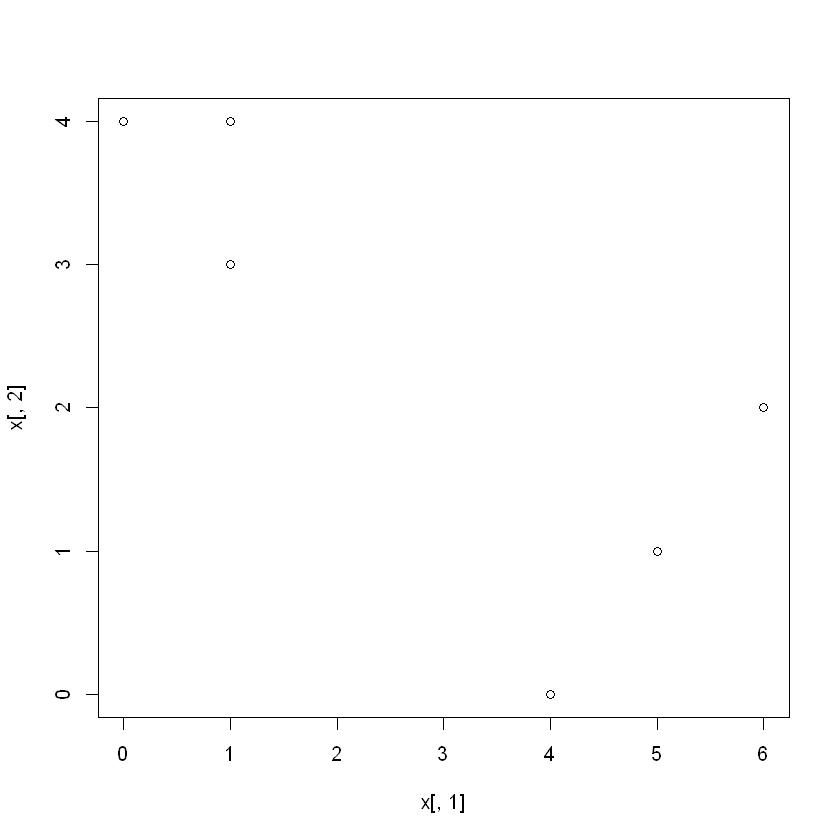

In [2]:
x = cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
plot (x[,1],x[,2])

b) Randomly assign a cluster label to each observation. You can
use the sample() command in R to do this. Report the cluster
labels for each observation.

In [3]:
label = sample(2,nrow(x),replace=TRUE)
label

[1] 2 2 1 1 1 1

(c) Compute the centroid for each cluster.

In [5]:
cent1 = c(mean(x[label==1, 1]), mean(x[label==1, 2]))
cent2 = c(mean(x[label==2, 1]), mean(x[label==2, 2]))
cent1

[1] 3.75 1.75

In [6]:
cent2

[1] 1.0 3.5

(d) Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation.

In [7]:
euclidean_dist = function (a,b) {
    result = sqrt((a[1]-b[1])^2+(a[2]-b[2])^2)
    return (result)
}

(e) Repeat (c) and (d) until the answers obtained stop changing.

In [8]:
labeling = function(x, cent1, cent2) {
  labels = rep(NA, nrow(x))
  for (i in 1:nrow(x)) {
    if (euclidean_dist(x[i,], cent1) < euclidean_dist(x[i,], cent2)) {
      labels[i] = 1
    } else {
      labels[i] = 2
    }
  }
  return(labels)
}

In [9]:
label = labeling(x, cent1, cent2)
label

[1] 2 2 2 1 1 1

In [10]:
cent1 = c(mean(x[label==1, 1]), mean(x[label==1, 2]))
  cent2 = c(mean(x[label==2, 1]), mean(x[label==2, 2]))
  print(cent1)
  print(cent2)
  label = labeling(x, cent1, cent2)
  print(label)

[1] 5 1
[1] 0.6666667 3.6666667
[1] 2 2 2 1 1 1


(f) In your plot from (a), color the observations according to the
cluster labels obtained.

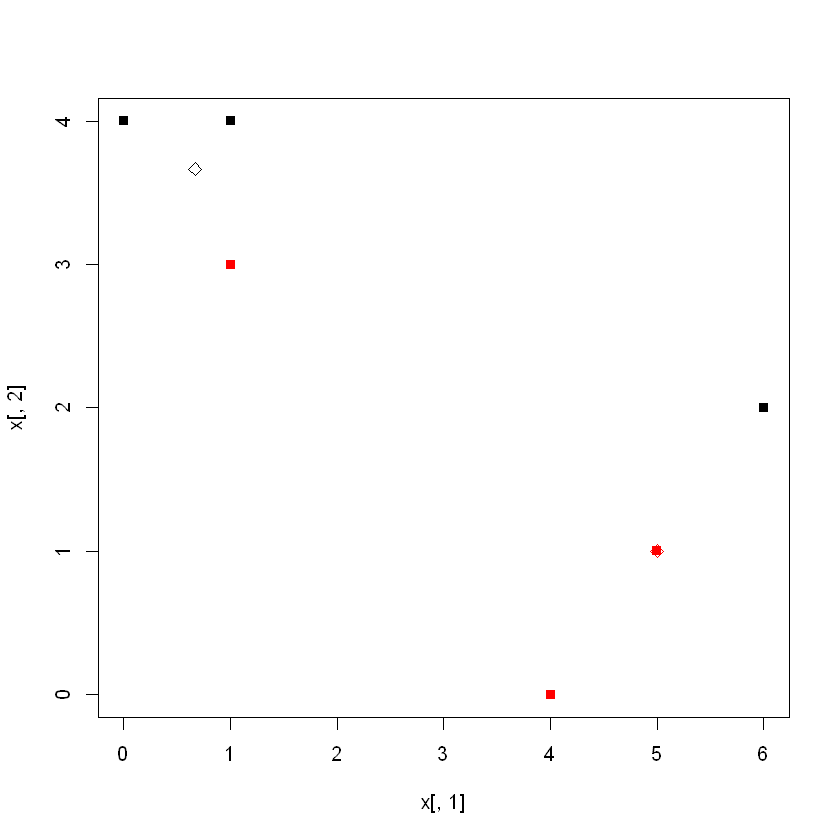

In [11]:
plot(x[,1], x[,2],col=c(1,2),pch=15,cex=1)
points(cent1[1], cent1[2], col=2, pch=5)
points(cent2[1], cent2[2], col=1, pch=5)

Ex : 8 

In [13]:
library(ISLR)

pr = prcomp(USArrests, center=T, scale=T)
var = pr$sdev^2
pve = var / sum(var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [14]:
loading = pr$rotation
pve2 = rep (NA,4)
mean = apply(USArrests, 2, mean)
sdev = sqrt(apply(USArrests, 2, var))

In [15]:
dsc = sweep(USArrests, MARGIN=2, mean,"-")
dsc =  sweep(dsc, MARGIN=2, sdev,"/")

In [16]:
for (i in 1:4){
    x = sweep(dsc, MARGIN=2, loading[,i], "*")
    pc = apply(x,1,sum)
    pve2[i] = sum(pc^2)
}
pve2 = pve2/sum(dsc^2)
pve2

[1] 0.62006039 0.24744129 0.08914080 0.04335752

Ex: 9 

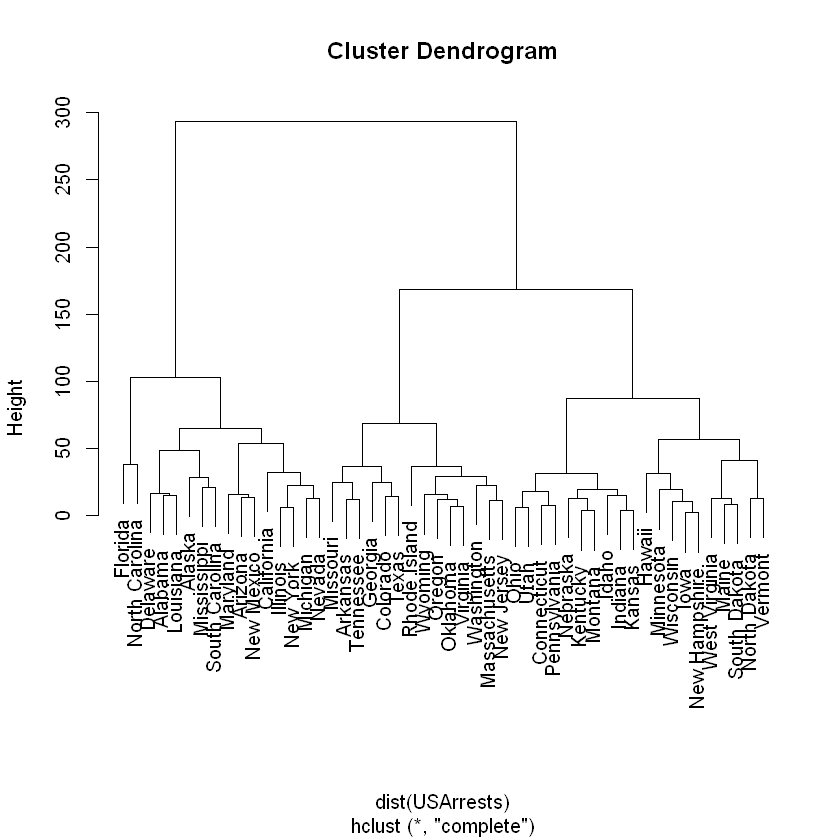

In [17]:
hier = hclust(dist(USArrests), method="complete")
plot(hier)

In [18]:
cutree(hier, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

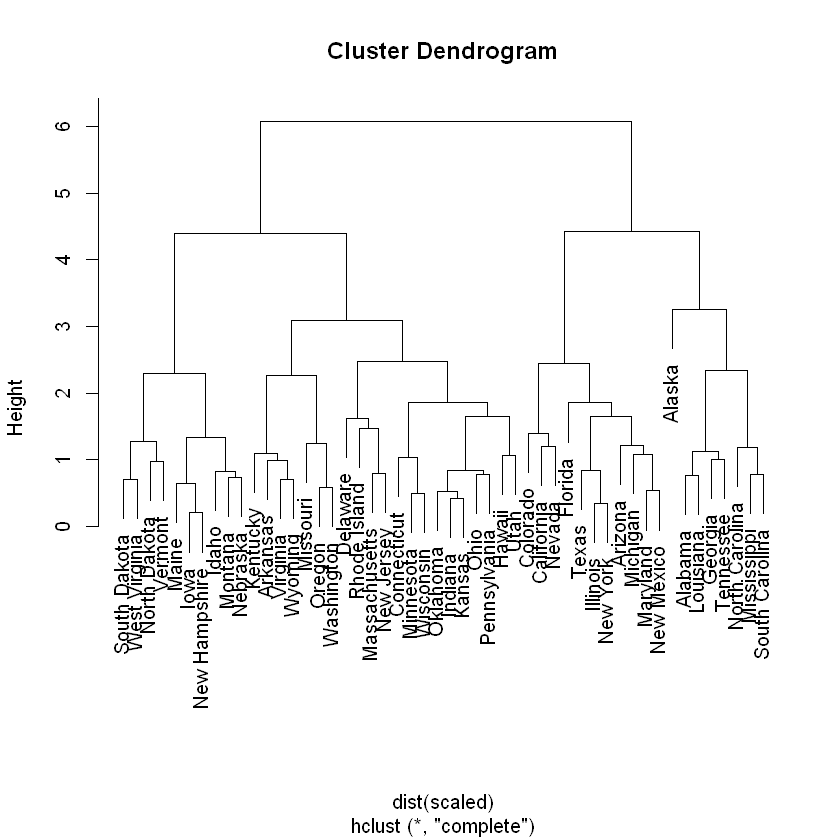

In [19]:
scaled =scale(USArrests)
h.scaled = hclust(dist(scaled), method="complete")
plot(h.scaled)

In [20]:
cutree(h.scaled, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

Scaling the varibales has an effect on the height of the dendogram and it effects the clusters of the dendogram. Data might require to be standardized.

Ex : 10

In [21]:
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)

In [22]:
x[1:20, 2] = 1
x[21:40, 2] = 1.5
x[41:60, 1] = 1
x[21:40, 1] = 1.5

In [23]:
pca= prcomp(x)
summary(pca)

Importance of components:
                          PC1    PC2      PC3      PC4      PC5    PC6      PC7
Standard deviation     0.6724 0.5823 0.001938 0.001764 0.001729 0.0016 0.001545
Proportion of Variance 0.5714 0.4286 0.000000 0.000000 0.000000 0.0000 0.000000
Cumulative Proportion  0.5714 0.9999 0.999950 0.999950 0.999950 1.0000 0.999960
                            PC8      PC9     PC10    PC11     PC12     PC13
Standard deviation     0.001507 0.001464 0.001389 0.00137 0.001329 0.001267
Proportion of Variance 0.000000 0.000000 0.000000 0.00000 0.000000 0.000000
Cumulative Proportion  0.999960 0.999970 0.999970 0.99997 0.999970 0.999970
                           PC14     PC15     PC16     PC17     PC18    PC19
Standard deviation     0.001222 0.001204 0.001196 0.001144 0.001125 0.00105
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.00000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.99998
                           PC20     PC21      

In [24]:
pca$x[,1:2]

PC1,PC2
-0.4702484,-0.7074406271
-0.4711734,-0.7083701254
-0.4698650,-0.7070555430
-0.4702164,-0.7074054317
-0.4708206,-0.7080136408
-0.4686612,-0.7058510366
-0.4715010,-0.7086964236
-0.4715505,-0.7087418401
-0.4693336,-0.7065182326
-0.4719985,-0.7091922033


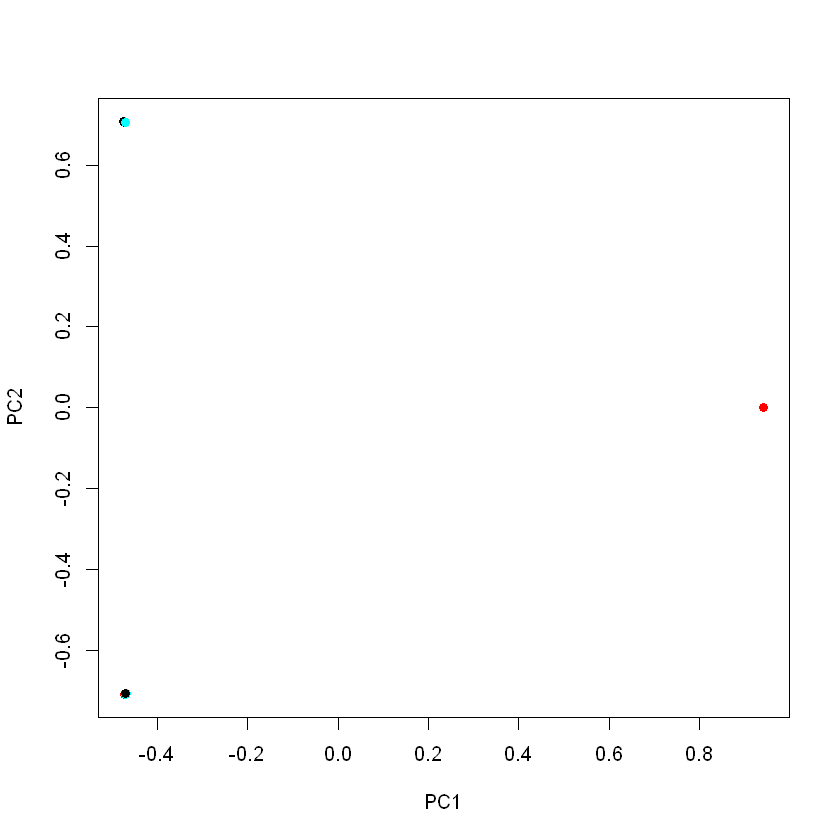

In [25]:
plot(pca$x[,1:2], col=c(2,1,5), pch=19)

In [26]:
kmean = kmeans(x, 3, nstart=20)
table(kmean$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1  0 20  0
  2  0  0 20
  3 20  0  0

In [27]:
km2 = kmeans(x, 2, nstart=20)
km2$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [28]:
km4 = kmeans(x, 4, nstart=20)
km4$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 4 4 1 4 1 4 1 4 4 1 4 1 4 4 1 4 4 1 1 1

In [29]:
km3 = kmeans(pca$x[,1:2], 3, nstart=20)
table(km3$cluster,c(rep(1,20), rep(2,20), rep(3,20)) )

   
     1  2  3
  1  0 20  0
  2  0  0 20
  3 20  0  0

In [30]:
c(rep(1,20), rep(2,20), rep(3,20))

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [31]:
km_scaled = kmeans(scale(x), 3, nstart=20)
km_scaled$cluster

[1] 1 3 1 3 1 1 1 3 3 2 2 1 2 1 2 1 2 2 2 2 3 1 1 1 1 3 2 2 3 2 3 2 3 1 3 1 2 2
[39] 2 2 3 1 3 3 3 3 2 1 1 3 1 3 1 2 3 2 1 3 3 2